<a href="https://colab.research.google.com/github/Dhairya890/GIS-SEM1/blob/main/GIS_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITLE**

### *Exploring Crime, Education, and Population Density: A GIS Project in India*


#**DESCRIPTION**

### *The primary objective of this project is to analyze and compare crime rates and education status across different districts of India. By examining these three critical dimensions – population density, crime rates, and education levels*

#**DATASET SOURCES**

### Population Density Data:

#### https://www.kaggle.com/datasets/imdevskp/india-district-wise-shape-files

## Education Data:

#### https://livingatlas-dcdev.opendata.arcgis.com/datasets/esriindia1::india-education-2014-15/explore?showTable=true

## Crime Data:

#### https://data.gov.in/catalog/district-wise-crimes-under-various-sections-indian-penal-code-ipc-crimes



# IMPORTS

In [1]:
!pip install mapclassify
import mapclassify
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.0 MB/s eta 0:00:00


# EXTRACTING FILES

In [2]:
! wget -q -O IND.zip https://drive.google.com/uc?id=1opoGF1mPFkiZwwk-rloTDRAprs2gfCn_&export=download
! wget -q -O education.csv https://drive.google.com/uc?id=1ckGy6E6jDCLkhQgZnDcG8pV4KjqHpuFb&export=download
! wget -q -O crime.csv https://drive.google.com/uc?id=18RF0JXp9V1TnAd_EFy1Sy72wKrQQXLIt&export=download

zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Ind = gpd.read_file('INDIA-MAP.shp')

df_edu = pd.read_csv("education.csv")
df_crime = pd.read_csv("crime.csv")

# PLOTTING SHAPE FILE

<Axes: >

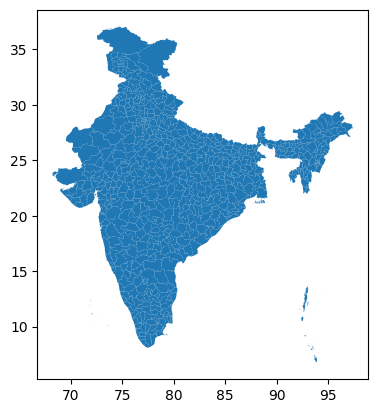

In [3]:
Ind.plot()

<Axes: >

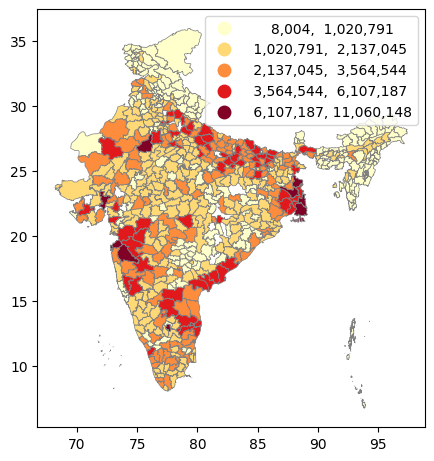

In [4]:
Ind.plot(figsize=(5,6),column='totalpopul',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}"})
#Ind.dtypes

In [5]:
Ind.dtypes

objectid         int64
statecode       object
statename       object
state_ut        object
distcode        object
distname        object
distarea       float64
totalpopul     float64
totalhh        float64
totpopmale     float64
totpopfema     float64
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

# PS1

## CRIME

In [8]:
Ind['distname']=Ind['distname'].str.upper()
df_crime['District']=df_crime['District'].str.upper()
df_crime.rename(columns={'District': 'distname'}, inplace=True)

In [9]:
df_pop_crime = pd.merge(Ind, df_crime, on='distname',how='inner',indicator=True)
df_pop_crime[['distname','Total Cognizable IPC crimes','totalpopul','_merge']]

,distname,Total Cognizable IPC crimes,totalpopul,_merge
0,NAINITAL,1095,954605.0,both
1,DEHRADUN,2178,1696694.0,both
2,ALMORA,139,622506.0,both
3,CHAMPAWAT,96,259648.0,both
4,UTTARKASHI,92,330086.0,both
...,...,...,...,...
481,MEDAK,6931,767428.0,both
482,NALGONDA,9254,1618416.0,both
483,ADILABAD,6036,708972.0,both
484,KHAMMAM,11022,1401639.0,both


### Population divided by crime

In [64]:
#df_pop_crime["pop_by_crime"] = df_pop_crime["totalpopul"]/df_pop_crime["Total Cognizable IPC crimes"]
df_pop_crime["pop_by_crime"] = (df_pop_crime["Total Cognizable IPC crimes"] /df_pop_crime["totalpopul"]) * 1000

<Axes: >

[]

[]

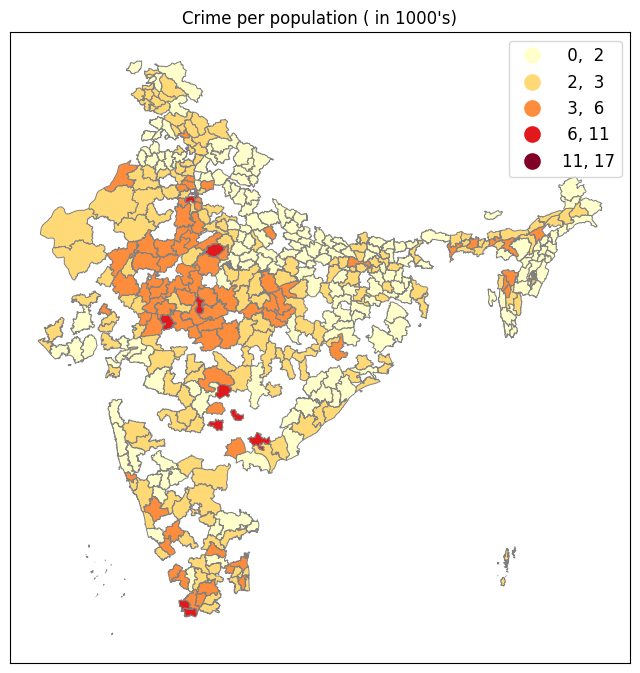

In [77]:
fig, ax = plt.subplots(1, figsize=(8,10))

df_pop_crime.plot(ax=ax,column='pop_by_crime',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.7,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.2})

ax.title.set_text("Crime per population ( in 1000's)")
ax.set_xticks([])
ax.set_yticks([])

In [12]:
min_theft_index = df_pop_crime['pop_by_crime'].idxmin()
max_theft_index = df_pop_crime['pop_by_crime'].idxmax()


district_with_min_theft = df_pop_crime.loc[min_theft_index, 'distname']
min_theft_value = df_pop_crime.loc[min_theft_index, 'pop_by_crime']
district_with_max_theft = df_pop_crime.loc[max_theft_index, 'distname']
max_theft_value = df_pop_crime.loc[max_theft_index, 'pop_by_crime']

print("district with minimum theft:", district_with_min_theft)
print("Minimum theft value:", min_theft_value)
print("district with Max theft:", district_with_max_theft)
print("Max theft value:", max_theft_value)

district with minimum theft: WEST
Minimum theft value: 0.0499362428206821
district with Max theft: NEW DELHI
Max theft value: 17.048815526323203


### Total crime

<Axes: >

[]

[]

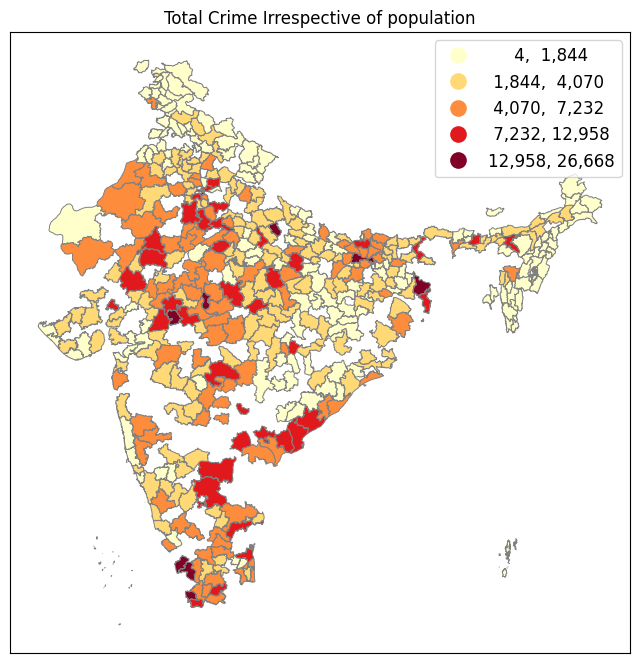

In [78]:
fig, ax = plt.subplots(1, figsize=(8,10))

df_pop_crime.plot(ax=ax,column='Total Cognizable IPC crimes',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.7,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.2}) #

ax.title.set_text("Total Crime Irrespective of population")
ax.set_xticks([])
ax.set_yticks([])

In [14]:
min_theft_index = df_pop_crime['Total Cognizable IPC crimes'].idxmin()
max_theft_index = df_pop_crime['Total Cognizable IPC crimes'].idxmax()


district_with_min_theft = df_pop_crime.loc[min_theft_index, 'distname']
min_theft_value = df_pop_crime.loc[min_theft_index, 'Total Cognizable IPC crimes']
district_with_max_theft = df_pop_crime.loc[max_theft_index, 'distname']
max_theft_value = df_pop_crime.loc[max_theft_index, 'Total Cognizable IPC crimes']

print("district with minimum theft:", district_with_min_theft)
print("Minimum theft value:", min_theft_value)
print("district with Max theft:", district_with_max_theft)
print("Max theft value:", max_theft_value)

district with minimum theft: DIBANG VALLEY
Minimum theft value: 4
district with Max theft: KOLKATA
Max theft value: 26668


### Comparison

<Axes: >

[]

[]

<Axes: >

Text(0.5, 1.0, "Crime per population ( in 1000's)")

[]

[]

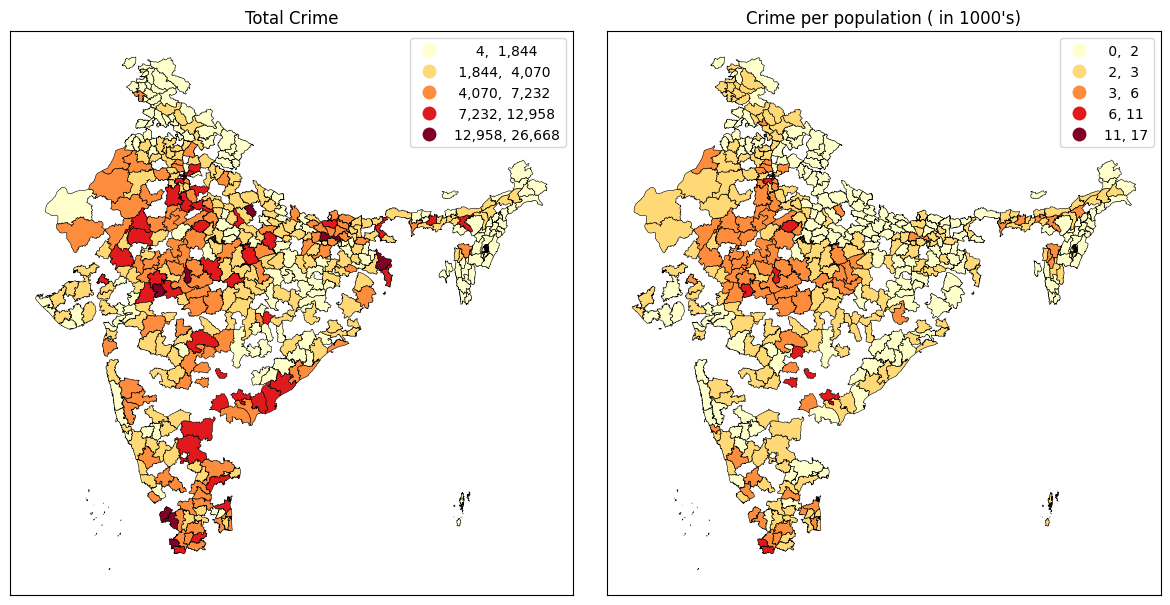

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df_pop_crime.plot(ax=ax1, column='Total Cognizable IPC crimes', legend=True, cmap='YlOrRd',
          scheme='naturalbreaks', k=5, edgecolor='black', linewidth=0.4,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1})
ax1.title.set_text("Total Crime")
ax1.set_xticks([])
ax1.set_yticks([])


df_pop_crime.plot(ax=ax2, column='pop_by_crime',legend=True,  cmap='YlOrRd',
          scheme='naturalbreaks', k=5, edgecolor='black', linewidth=0.4,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1})
ax2.set_title(f"Crime per population ( in 1000's)")
#ax2.set_axis_off()
ax2.set_xticks([])
ax2.set_yticks([])

#df_pop_crime.plot(ax=ax2, column='pop_by_crime', cmap='magma_r', linewidth=0.4, edgecolor='black', legend=True)
#ax2.set_title(f"Crime per population ( in 1000's)")
#ax2.set_axis_off()

plt.tight_layout()

plt.show()

## EDUCATION

In [15]:
nan_counts = df_edu.iloc[:,3:].isna().sum()

# Find the column with the least NaN values
column_with_least_nan = nan_counts.idxmin()
min_nan_count = nan_counts.min()
print(f"Column with the least NaN values: {column_with_least_nan}")
print(f"Number of NaN values in that column: {min_nan_count}")

Column with the least NaN values: no_of_schools
Number of NaN values in that column: 54


In [16]:
df_edu['distname']=df_edu['distname'].str.upper()


In [17]:
df_pop_edu = pd.merge(Ind, df_edu, on='distname',how='outer',indicator=True)
df_pop_edu[['distname','no_of_schools','totalpopul','_merge']]

,distname,no_of_schools,totalpopul,_merge
0,NAINITAL,1991.0,954605.0,both
1,DEHRADUN,2449.0,1696694.0,both
2,ALMORA,2241.0,622506.0,both
3,CHAMPAWAT,854.0,259648.0,both
4,UTTARKASHI,1352.0,330086.0,both
...,...,...,...,...
704,MAHABUBNAGAR,4904.0,1486777.0,both
705,KARGIL,586.0,140802.0,both
706,LEH (LADAKH),NaN,133487.0,left_only
707,LEH(LADAKH),375.0,NaN,right_only


### Total Schools

<Axes: >

[]

[]

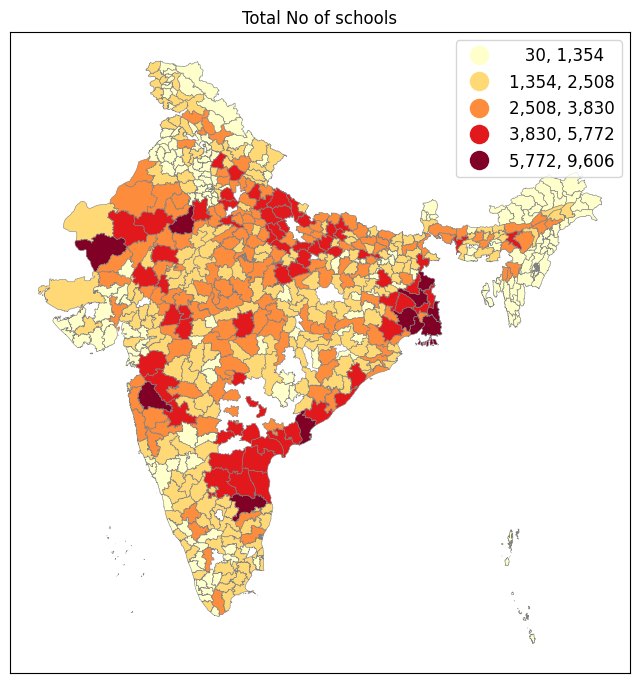

In [79]:

fig, ax = plt.subplots(1, figsize=(8,10))

df_pop_edu.plot(ax=ax,column='no_of_schools',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.4})

ax.title.set_text("Total No of schools")
ax.set_xticks([])
ax.set_yticks([])

In [19]:
min_schools = df_pop_edu['no_of_schools'].idxmin()
max_schools = df_pop_edu['no_of_schools'].idxmax()

district_with_min_schools = df_pop_edu.loc[min_schools, 'distname']
min_school_value = df_pop_edu.loc[min_schools, 'no_of_schools']
district_with_max_schools = df_pop_edu.loc[max_schools, 'distname']
max_school_value = df_pop_edu.loc[max_schools, 'no_of_schools']

print("district with minimum schools:", district_with_min_schools)
print("Minimum schools:", min_school_value)
print("district with Max schools:", district_with_max_schools)
print("Max schools:", max_school_value)

district with minimum schools: DIBANG VALLEY
Minimum schools: 30.0
district with Max schools: PASCHIM MEDINIPUR
Max schools: 9606.0


### Schools Per 1000 people

In [20]:
# df_pop_edu["popul_by_schools"] = df_pop_edu["totalpopul"]/df_pop_edu["no_of_schools"]
df_pop_edu["popul_by_schools"] = (df_pop_edu["no_of_schools"]/df_pop_edu["totalpopul"]) * 1000

In [21]:
df_pop_edu["popul_by_schools"].isna().sum()

71

<Axes: >

[]

[]

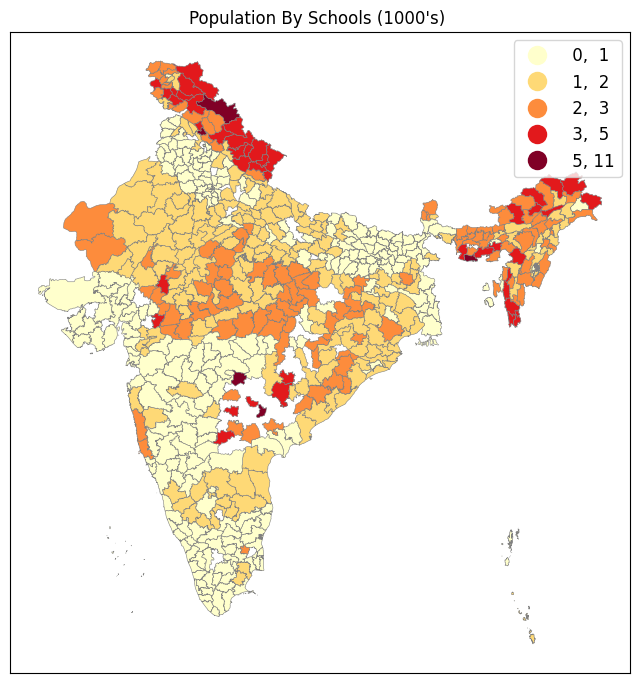

In [80]:

fig, ax = plt.subplots(1, figsize=(8,10))

df_pop_edu.plot(ax=ax,column='popul_by_schools',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.4})

ax.title.set_text("Population By Schools (1000's) ")
ax.set_xticks([])
ax.set_yticks([])

In [23]:
min_schools = df_pop_edu['popul_by_schools'].idxmin()
max_schools = df_pop_edu['popul_by_schools'].idxmax()


district_with_min_schools = df_pop_edu.loc[min_schools, 'distname']
min_school_value = df_pop_edu.loc[min_schools, 'no_of_schools']
district_with_max_schools = df_pop_edu.loc[max_schools, 'distname']
max_school_value = df_pop_edu.loc[max_schools, 'no_of_schools']

print("district with minimum schools:", district_with_min_schools)
print("Minimum schools wrt population:", min_school_value)
print("district with Max schools:", district_with_max_schools)
print("Max schools wrt population:", max_school_value)

district with minimum schools: CHANDIGARH
Minimum schools wrt population: 201.0
district with Max schools: BIJAPUR
Max schools wrt population: 2732.0


### Comparison

<Axes: >

[]

[]

<Axes: >

Text(0.5, 1.0, "Schools per population ( in 1000's)")

[]

[]

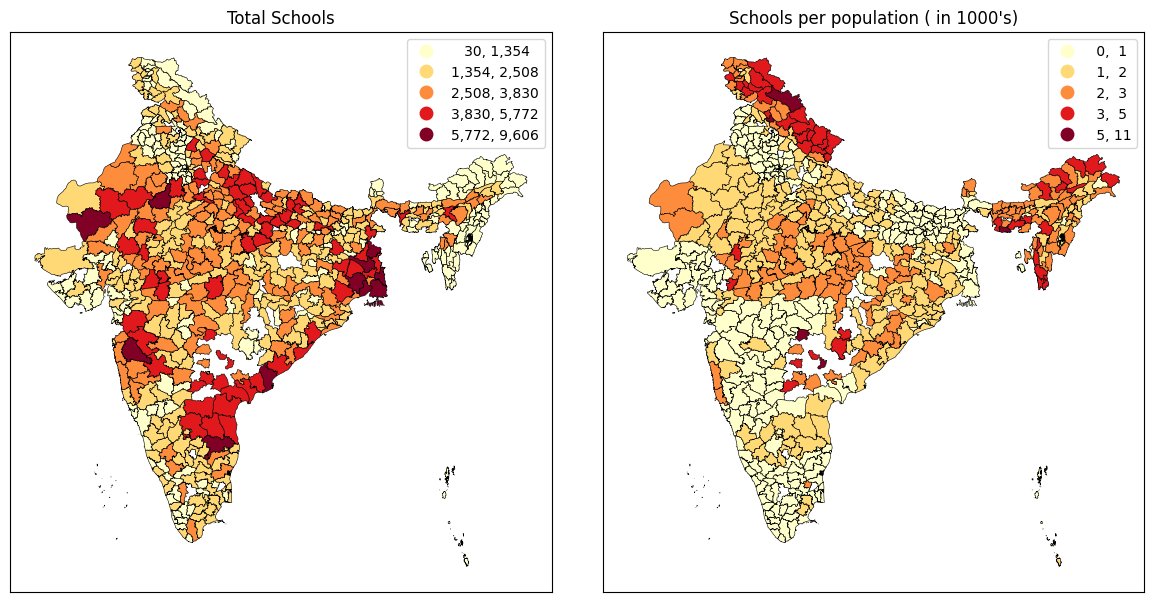

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df_pop_edu.plot(ax=ax1, column='no_of_schools', legend=True, cmap='YlOrRd',
          scheme='naturalbreaks', k=5, edgecolor='black', linewidth=0.4,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1})
ax1.title.set_text("Total Schools")
ax1.set_xticks([])
ax1.set_yticks([])


df_pop_edu.plot(ax=ax2, column='popul_by_schools',legend=True,  cmap='YlOrRd',
          scheme='naturalbreaks', k=5, edgecolor='black', linewidth=0.4,
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'upper right', 'markerscale': 1})
ax2.set_title(f"Schools per population ( in 1000's)")
#ax2.set_axis_off()
ax2.set_xticks([])
ax2.set_yticks([])

#df_pop_crime.plot(ax=ax2, column='pop_by_crime', cmap='magma_r', linewidth=0.4, edgecolor='black', legend=True)
#ax2.set_title(f"Crime per population ( in 1000's)")
#ax2.set_axis_off()

plt.tight_layout()

plt.show()

### Literacy Rate

<Axes: >

[]

[]

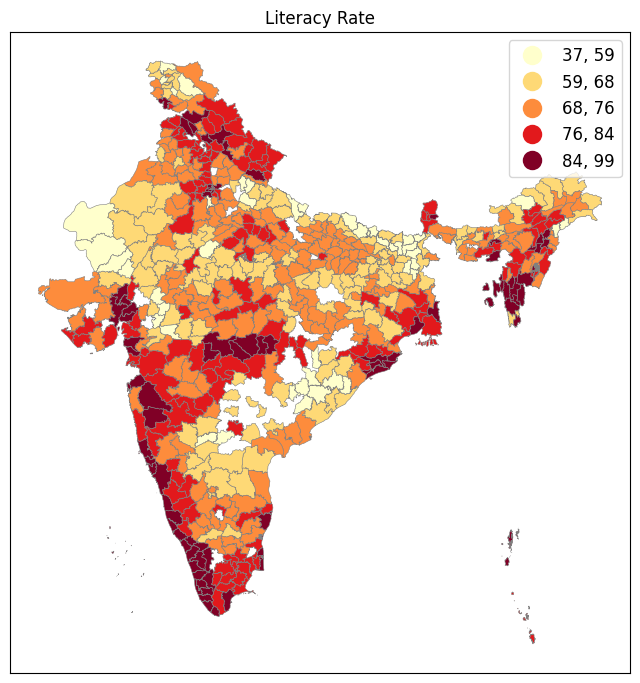

In [83]:
fig, ax = plt.subplots(1, figsize=(8,10))

df_pop_edu.plot(ax=ax,column='overall_literacy',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'large','fontsize':'large','markerscale':1.4})

ax.title.set_text("Literacy Rate")
ax.set_xticks([])
ax.set_yticks([])

In [25]:
min_schools = df_pop_edu['overall_literacy'].idxmin()
max_schools = df_pop_edu['overall_literacy'].idxmax()


district_with_min_literacy = df_pop_edu.loc[min_schools, 'distname']
min_literacy_value = df_pop_edu.loc[min_schools, 'overall_literacy']
district_with_max_literacy = df_pop_edu.loc[max_schools, 'distname']
max_literacy_value = df_pop_edu.loc[max_schools, 'overall_literacy']

print("district with minimum schools:", district_with_min_literacy)
print("Minimum schools wrt population:", min_literacy_value)
print("district with Max schools:", district_with_max_literacy)
print("Max schools wrt population:", max_literacy_value)

district with minimum schools: ALIRAJPUR
Minimum schools wrt population: 37.22
district with Max schools: SERCHHIP
Max schools wrt population: 98.76


# Merging crime and Literacy Rate

In [84]:
df_edu.columns

Index(['objectid', 'distname', 'statename', 'no_of_schools', 'schboytot',
       'schgirtot', 'enrtot', 'sclstot', 'stchtot', 'roadtot', 'splaytot',
       'sbndrtot', 'sgtoiltot', 'sbtoiltot', 'swattot',
       'schools_with_electricity', 'schools_with_computer', 'estdtot',
       'mdmtot', 'mdminpremisestot', 'clstot', 'tchtot', 'tchftot', 'enrgtot',
       'pcmtch', 'pcftch', 'total_population', 'overall_literacy',
       'female_literacy', 'male_literacy', 'class_room_gc',
       'class_room_nminorr', 'class_room_nmajorr',
       'teacher_eduqualification_bs', 'teacher_eduqualification_s',
       'teacher_eduqualification_hs', 'teacher_eduqualification_g',
       'teacher_eduqualification_pg', 'teacher_eduqualification_mphil_',
       'teacher_eduqualification_pd', 'teacher_eduqualification_no_res',
       'tch_5556t', 'tch_5758t', 'tch_5960t'],
      dtype='object')

In [89]:
df_crime.columns

Index(['States/UTs', 'distname', 'Year', 'Murder', 'Attempt to commit Murder',
       'Culpable Homicide not amounting to Murder',
       'Attempt to commit Culpable Homicide', 'Rape', 'Custodial Rape',
       'Custodial_Gang Rape', 'Custodial_Other Rape',
       'Rape other than Custodial', 'Rape_Gang Rape', 'Rape_Others',
       'Attempt to commit Rape', 'Kidnapping & Abduction_Total',
       'Kidnapping & Abduction', 'Kidnapping & Abduction in order to Murder',
       'Kidnapping for Ransom',
       'Kidnapping & Abduction of Women to compel her for marriage',
       'Other Kidnapping', 'Dacoity', 'Dacoity with Murder', 'Other Dacoity',
       'Making Preparation and Assembly for committing Dacoity', 'Robbery',
       'Criminal Trespass/Burglary', 'Criminal Trespass or Burglary',
       'House Trespass & House Breaking', 'Theft', 'Auto Theft',
       'Other Thefts', 'Unlawful Assembly', 'Riots', 'Riots_Communal',
       'Riots_Industrial', 'Riots_Political', 'Riots_Caste Conflict',


In [26]:
Ind.dtypes

objectid         int64
statecode       object
statename       object
state_ut        object
distcode        object
distname        object
distarea       float64
totalpopul     float64
totalhh        float64
totpopmale     float64
totpopfema     float64
st_areasha     float64
st_lengths     float64
geometry      geometry
dtype: object

In [27]:
df_crime_edu = pd.merge(df_crime, df_edu, on='distname',how='outer',indicator = False)


In [100]:
crime_reqd = df_crime[['distname','Total Cognizable IPC crimes']]
edu_reqd = df_edu[['distname','no_of_schools','overall_literacy','male_literacy']]

In [29]:
df_crime_edu = pd.merge(Ind,crime_reqd, on='distname',how='outer',indicator=False)


In [30]:
df_crime_edu.dtypes

objectid                        float64
statecode                        object
statename                        object
state_ut                         object
distcode                         object
distname                         object
distarea                        float64
totalpopul                      float64
totalhh                         float64
totpopmale                      float64
totpopfema                      float64
st_areasha                      float64
st_lengths                      float64
geometry                       geometry
Total Cognizable IPC crimes     float64
dtype: object

In [31]:
df_reqd = pd.merge(df_crime_edu,edu_reqd ,on='distname',how='outer')


In [33]:
#df_reqd = df_reqd.drop('geometry',axis =1)
#df_reqd.head(1)

In [34]:
df_reqd["crime_by_literacy_rate"] = df_reqd["Total Cognizable IPC crimes"] / ((df_reqd["overall_literacy"]*df_edu["total_population"])/100)
df_reqd["crime_by_schools"] = df_reqd["Total Cognizable IPC crimes"] / df_reqd["no_of_schools"]

#df_reqd.dtypes
#df_reqd[['no_of_schools']]



<Axes: >

[]

[]

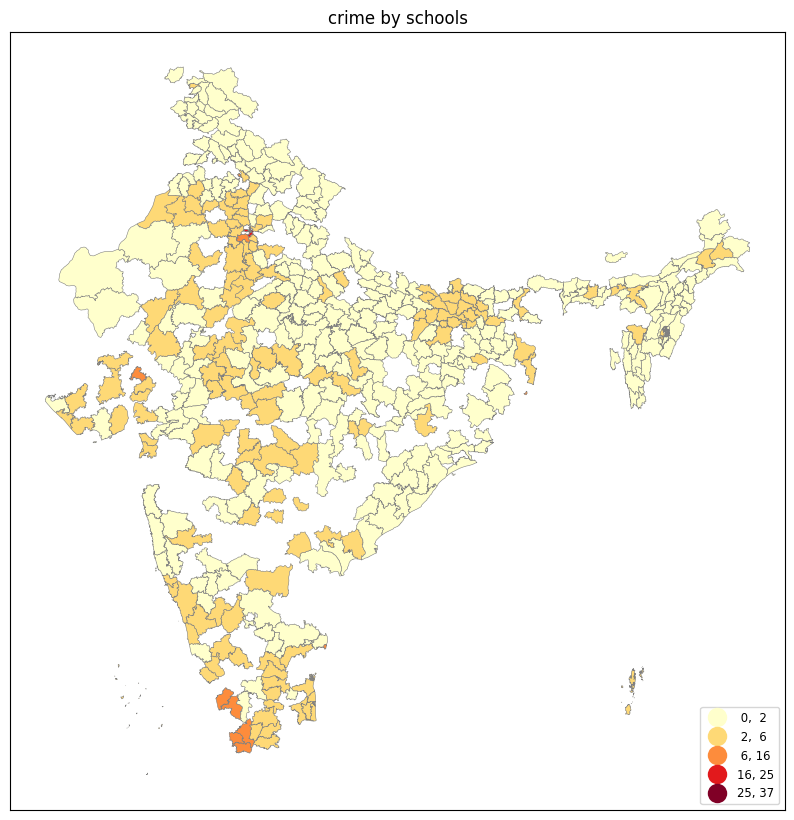

In [35]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_reqd.plot(ax=ax,column='crime_by_schools',legend=True,cmap='YlOrRd',scheme='naturalbreaks',k=5,
         edgecolor='grey',linewidth=0.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("crime by schools")
ax.set_xticks([])
ax.set_yticks([])


<Axes: >

[]

[]

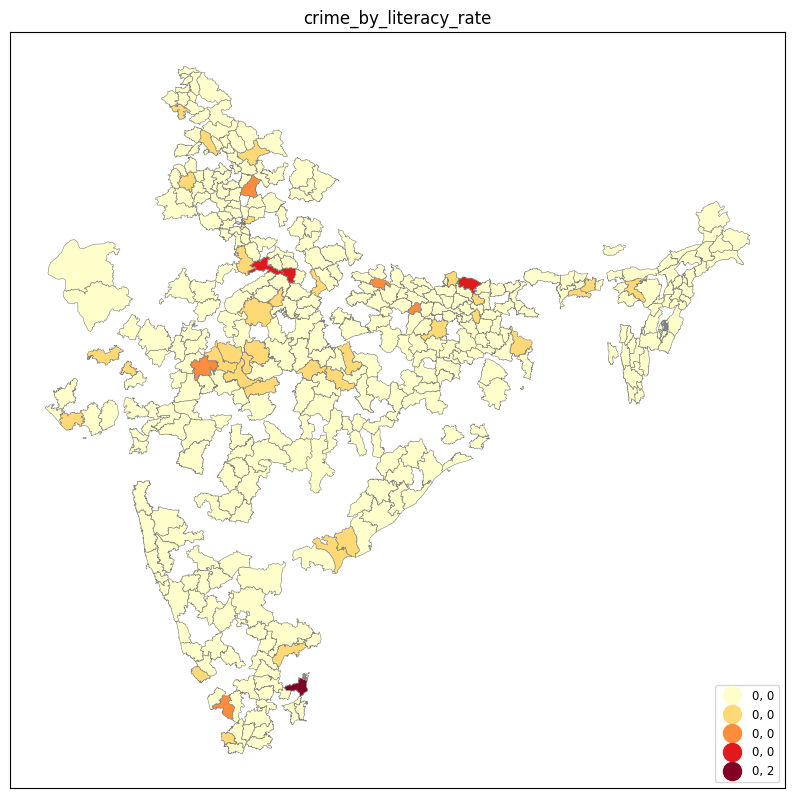

In [36]:
fig, ax = plt.subplots(1, figsize=(10,12))
df_reqd.plot(ax=ax,column='crime_by_literacy_rate',legend=True,cmap='YlOrRd',scheme='naturalbreaks',k=5,
         edgecolor='grey',linewidth=0.4,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("crime_by_literacy_rate")
ax.set_xticks([])
ax.set_yticks([])

In [106]:
columns_to_sum = [
    "Kidnapping & Abduction of Women to compel her for marriage",
    "Rape",
    "Custodial Rape",
    "Custodial_Gang Rape",
    "Custodial_Other Rape",
    "Rape other than Custodial",
    "Rape_Gang Rape",
    "Rape_Others",
    "Attempt to commit Rape",
    "Acid attack",
    "Attempt to Acid Attack",
    "Dowry Deaths",
    "Assault on Women with intent to outrage her Modesty",
    "Sexual Harassment",
    "Assault or use of criminal force to women with intent to Disrobe",
    "Voyeurism",
    "Stalking",
    "Other Assault on Women",
    "Insult to the Modesty of Women",
    "Cruelty by Husband or his Relatives",
    "Importation of Girls from Foreign Country"
]

df_crime['TOTAL_CRIME_AGAINST_FEMALE'] = df_crime[columns_to_sum].sum(axis=1)


In [108]:
crime_reqd = df_crime[['distname','Total Cognizable IPC crimes','TOTAL_CRIME_AGAINST_FEMALE']]
edu_reqd = df_edu[['distname','no_of_schools','overall_literacy','male_literacy']]



In [109]:
df_crime_edu = pd.merge(Ind,crime_reqd, on='distname',how='outer',indicator=False)
df_reqd = pd.merge(df_crime_edu,edu_reqd ,on='distname',how='outer')


In [120]:
df_reqd["crime_female_by_male_literacy"] = df_reqd["TOTAL_CRIME_AGAINST_FEMALE"] / ((df_reqd["male_literacy"]*(df_edu["total_population"])/2)/100)

#df_reqd["crime_female_by_male_literacy"] = df_reqd["TOTAL_CRIME_AGAINST_FEMALE"] / df_reqd["male_literacy"]

<Axes: >

[]

[]

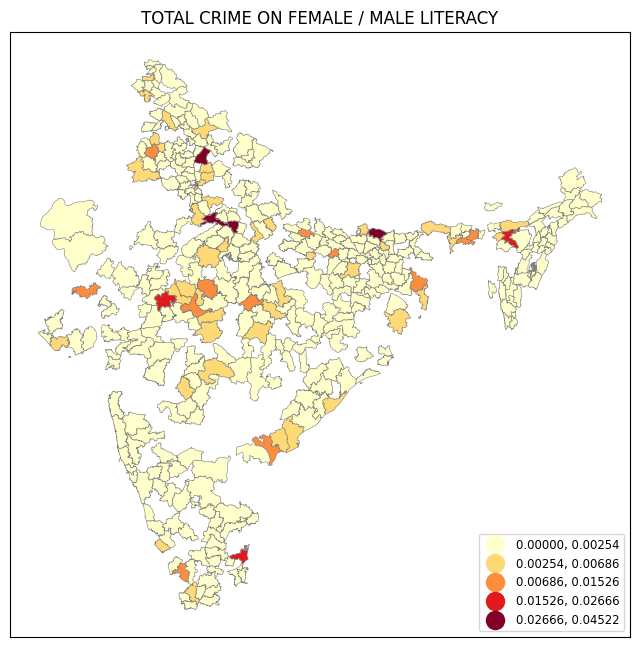

In [130]:
fig, ax = plt.subplots(1, figsize=(8,10))
df_reqd.plot(ax=ax,column='crime_female_by_male_literacy',legend=True,cmap='YlOrRd',scheme='naturalbreaks',k=5,
         edgecolor='grey',linewidth=0.4,legend_kwds= {"fmt": "{:,.5f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("TOTAL CRIME ON FEMALE / MALE LITERACY")
ax.set_xticks([])
ax.set_yticks([])

# creating groupby statenames

In [37]:
df_edu.columns

Index(['objectid', 'distname', 'statename', 'no_of_schools', 'schboytot',
       'schgirtot', 'enrtot', 'sclstot', 'stchtot', 'roadtot', 'splaytot',
       'sbndrtot', 'sgtoiltot', 'sbtoiltot', 'swattot',
       'schools_with_electricity', 'schools_with_computer', 'estdtot',
       'mdmtot', 'mdminpremisestot', 'clstot', 'tchtot', 'tchftot', 'enrgtot',
       'pcmtch', 'pcftch', 'total_population', 'overall_literacy',
       'female_literacy', 'male_literacy', 'class_room_gc',
       'class_room_nminorr', 'class_room_nmajorr',
       'teacher_eduqualification_bs', 'teacher_eduqualification_s',
       'teacher_eduqualification_hs', 'teacher_eduqualification_g',
       'teacher_eduqualification_pg', 'teacher_eduqualification_mphil_',
       'teacher_eduqualification_pd', 'teacher_eduqualification_no_res',
       'tch_5556t', 'tch_5758t', 'tch_5960t'],
      dtype='object')

In [131]:
df_crime.columns

Index(['States/UTs', 'distname', 'Year', 'Murder', 'Attempt to commit Murder',
       'Culpable Homicide not amounting to Murder',
       'Attempt to commit Culpable Homicide', 'Rape', 'Custodial Rape',
       'Custodial_Gang Rape', 'Custodial_Other Rape',
       'Rape other than Custodial', 'Rape_Gang Rape', 'Rape_Others',
       'Attempt to commit Rape', 'Kidnapping & Abduction_Total',
       'Kidnapping & Abduction', 'Kidnapping & Abduction in order to Murder',
       'Kidnapping for Ransom',
       'Kidnapping & Abduction of Women to compel her for marriage',
       'Other Kidnapping', 'Dacoity', 'Dacoity with Murder', 'Other Dacoity',
       'Making Preparation and Assembly for committing Dacoity', 'Robbery',
       'Criminal Trespass/Burglary', 'Criminal Trespass or Burglary',
       'House Trespass & House Breaking', 'Theft', 'Auto Theft',
       'Other Thefts', 'Unlawful Assembly', 'Riots', 'Riots_Communal',
       'Riots_Industrial', 'Riots_Political', 'Riots_Caste Conflict',


In [38]:
df_edu_reqd = pd.DataFrame()

In [39]:
selected_columns = df_edu[["statename","distname","no_of_schools","overall_literacy","total_population"]]

In [40]:
df_edu_reqd = pd.concat([df_edu_reqd,selected_columns] , axis=1)

In [41]:
df_edu_reqd.dtypes

statename            object
distname             object
no_of_schools       float64
overall_literacy    float64
total_population    float64
dtype: object

In [42]:
df_edu_reqd.isnull().sum()

statename            0
distname             0
no_of_schools       54
overall_literacy    70
total_population    70
dtype: int64

In [43]:
df_edu_reqd.head()

,statename,distname,no_of_schools,overall_literacy,total_population
0,Punjab,SHAHID BHAGAT SINGH NAGAR,NaN,NaN,NaN
1,Gujarat,TAPI,922.0,69.23,806489.0
2,Madhya Pradesh,HARDA,1062.0,74.04,570302.0
3,Jammu & Kashmir,DATA NOT AVAILABLE,NaN,NaN,NaN
4,Gujarat,MAHISAGAR,NaN,NaN,NaN


In [44]:
# Get unique state names from df_edu_reqd and df_crime
unique_statenames_edu = df_edu_reqd['statename'].unique()
unique_statenames_crime = df_crime['States/UTs'].unique()

# Find state names that are in df_edu_reqd but not in df_crime
missing_statenames_in_crime = set(unique_statenames_edu) - set(unique_statenames_crime)

# Find state names that are in df_crime but not in df_edu_reqd
missing_statenames_in_edu = set(unique_statenames_crime) - set(unique_statenames_edu)

# Print the results
print("State names in df_edu_reqd but not in df_crime:")
print(missing_statenames_in_crime)

print("\nState names in df_crime but not in df_edu_reqd:")
print(missing_statenames_in_edu)


State names in df_edu_reqd but not in df_crime:
{'Orissa', 'Chhatisgarh', 'Pondicherry', 'Andaman & Nicobar Islands', 'NCT of Delhi', 'Ladakh', 'Dadra & Nagar Haveli'}

State names in df_crime but not in df_edu_reqd:
{'Puducherry', 'Delhi UT', 'D&N Haveli', 'Odisha', 'A&N Islands', 'Chhattisgarh'}


In [45]:
pip install fuzzywuzzy

In [46]:
from fuzzywuzzy import fuzz, process

# Define the target string (in this case, "ladakh")
target_string = "ladakh"

# Get unique state/UT names from df_crime
unique_statenames_crime = df_crime['States/UTs'].unique()

# Create a list to store similar matches
similar_matches = []

# Use fuzzy matching to find similar names
for state_name in unique_statenames_crime:
    similarity_score = fuzz.ratio(target_string.lower(), state_name.lower())
    if similarity_score >= 20:  # Adjust the threshold as needed
        similar_matches.append(state_name)

# Get unique similar matches
unique_similar_matches = list(set(similar_matches))

# Print the unique similar matches
print("Unique state/UT names similar to 'ladakh':")
for match in unique_similar_matches:
    print(match)


Unique state/UT names similar to 'ladakh':
Meghalaya
Puducherry
Jammu & Kashmir
Assam
Haryana
Daman & Diu
Madhya Pradesh
Goa
Kerala
Tamil Nadu
A&N Islands
Chandigarh
Lakshadweep
Nagaland
Himachal Pradesh
Uttar Pradesh
Maharashtra
Delhi UT
Jharkhand
Telangana
Chhattisgarh
Arunachal Pradesh
Gujarat
Uttarakhand
Andhra Pradesh
Rajasthan
Karnataka


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [47]:
indarr = Ind["statename"].unique()

In [48]:
indarr.sort

<function ndarray.sort>

In [49]:
indarr

array(['Uttarakhand', 'Himachal Pradesh', 'Madhya Pradesh',
       'Jammu & Kashmir', 'Gujarat', 'Andhra Pradesh', 'West Bengal',
       'Uttar Pradesh', 'Daman & Diu', 'Kerala', 'Lakshadweep', 'Sikkim',
       'Bihar', 'Dadra & Nagar Haveli', 'Jharkhand', 'NCT of Delhi',
       'Haryana', 'Punjab', 'Karnataka', 'Maharashtra', 'Chandigarh',
       'Pondicherry', 'Manipur', 'Mizoram', 'Tamil Nadu', 'Nagaland',
       'Arunachal Pradesh', 'Assam', 'Tripura', 'Meghalaya', 'Telangana',
       'Goa', 'Andaman & Nicobar Islands', 'Orissa', 'Rajasthan',
       'Chhatisgarh', 'Ladakh'], dtype=object)